In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model 

In [19]:
df = pd.read_csv("csv/homeprice2.csv") # Load the prices in a panda DataFrame
df

,area,price
0,12,250
1,15,280
2,17,320
3,20,345
4,24,370
5,30,400


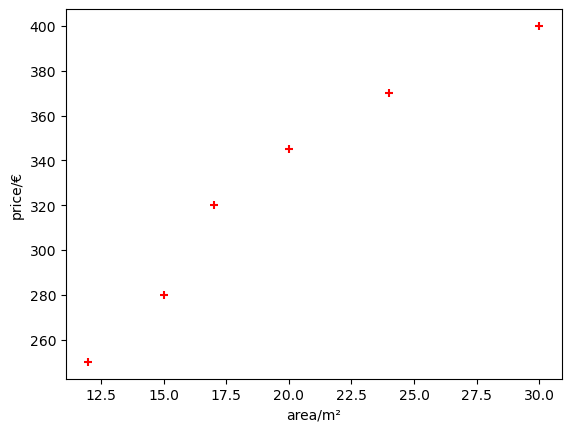

In [25]:
%matplotlib inline
plt.xlabel("area/m²") 
plt.ylabel("price/€")  
plt.scatter(df.area,df.price ,color= "red", marker="+")

In [101]:
reg =linear_model.LinearRegression()
reg.fit(df[["area"]],df.price) # Training the model

LinearRegression()

In [100]:
reg.predict(np.array([[19]]))

/home/nooraldeenyamk/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([321.953125])

In [99]:
# reg.coef_ --> mx +b --> m
# reg.intercept_ --> mx +b --> b

# Coefficient and intercept
print(f"Coefficient (m): {reg.coef_}")
print(f"Intercept (b): {reg.intercept_}")

Coefficient (m): [8.3203125]
Intercept (b): 163.86718749999991


/home/nooraldeenyamk/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


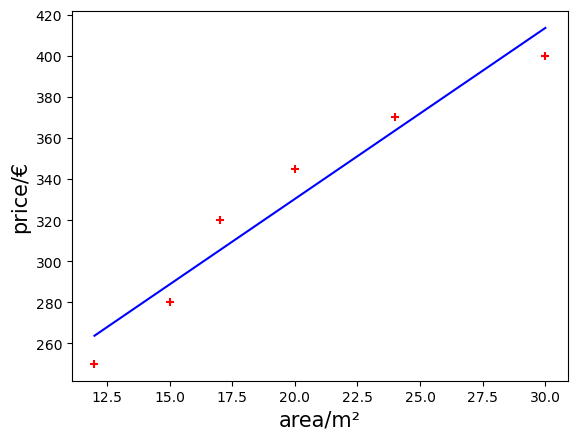

In [118]:
# Linear Regression
%matplotlib inline
plt.xlabel("area/m²", fontsize = 15) 
plt.ylabel("price/€", fontsize = 15)  
plt.scatter(df.area,df.price ,color= "red", marker="+")
plt.plot(df['area'].values, reg.predict(df[["area"]].values), color="blue")


In [75]:
df2 = pd.read_csv("csv/homeprice3.csv") # csv just with areas
df2
# df2.head(5)

,area
0,16
1,17
2,19
3,15
4,45
5,33
6,54
7,23
8,66
9,45


In [76]:
p = reg.predict(df2) # predict the prices
df2["price"] = p
df2

,area,price
0,16,296.992188
1,17,305.312500
2,19,321.953125
3,15,288.671875
4,45,538.281250
5,33,438.437500
6,54,613.164063
7,23,355.234375
8,66,713.007813
9,45,538.281250


In [78]:
df2.to_csv("prediction.csv", index=False)

In [20]:
# Save the model 
import pickle
import joblib # Joblib : more effcient on objetcts that carry large numpy arrays 

In [21]:
# Write Mode: Saving the model
with open("model_pickle","wb") as f:
    pickle.dump(reg,f)

In [24]:
# Read Mode: load the model
with open("model_pickle","rb") as f:
    mp = pickle.load(f)

mp.predict(np.array([[19]]))

/home/nooraldeenyamk/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([321.953125])

In [25]:
# Save the model with joblib 
joblib.dump(reg,"model_joblib")

['model_joblib']

In [26]:
# Load the model 
mj = joblib.load("model_joblib")

In [27]:
mj.predict(np.array([[19]]))

/home/nooraldeenyamk/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([321.953125])